# Trading Strategies powered by Machine Learning - Classification

## Logistic Regression with scikit-learn - a simple Introduction (Part 1)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

In [2]:
hours = np.array([0.5, 0.75, 1., 1.25, 1.5, 1.75, 1.75, 2.,
                  2.25, 2.5, 2.75, 3., 3.25, 3.5, 4., 4.25,
                  4.5, 4.75, 5., 5.5])

In [3]:
success = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1]) 

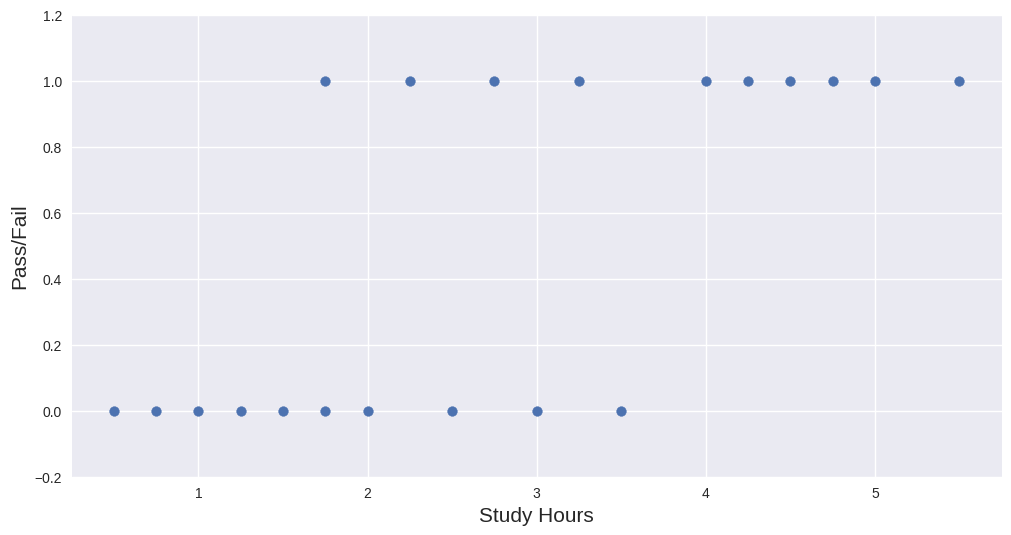

In [4]:
plt.figure(figsize=(12, 6))
plt.scatter(hours, success)
plt.xlabel("Study Hours", fontsize = 15)
plt.ylabel("Pass/Fail", fontsize = 15)
plt.ylim(-0.2, 1.2)
plt.show()

In [5]:
data = pd.DataFrame({'hours': hours, 'success': success})

In [6]:
data

,hours,success
0,0.50,0
1,0.75,0
2,1.00,0
3,1.25,0
4,1.50,0
5,1.75,0
6,1.75,1
7,2.00,0
8,2.25,1
9,2.50,0


In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
lm = LinearRegression(fit_intercept= True)

In [9]:
lm.fit(data.hours.to_frame(), data.success)

LinearRegression()

In [10]:
lm.coef_

array([0.23459561])

In [11]:
lm.intercept_

-0.15393526898848742

In [12]:
data["pred"] = lm.predict(data.hours.to_frame())
data

,hours,success,pred
0,0.50,0,-0.036637
1,0.75,0,0.022011
2,1.00,0,0.080660
3,1.25,0,0.139309
4,1.50,0,0.197958
5,1.75,0,0.256607
6,1.75,1,0.256607
7,2.00,0,0.315256
8,2.25,1,0.373905
9,2.50,0,0.432554


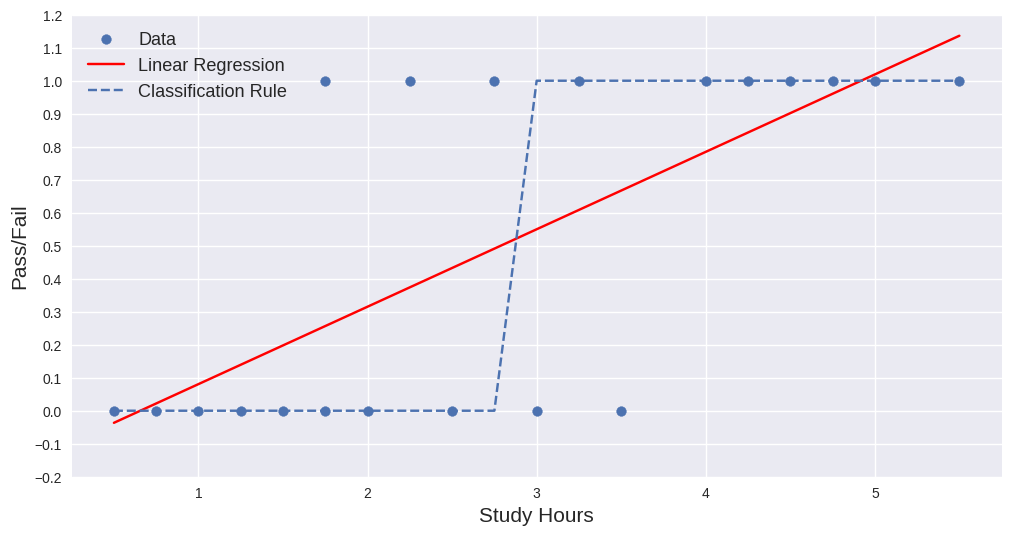

In [13]:
plt.figure(figsize=(12, 6))
plt.scatter(data.hours, data.success, label = "Data")
plt.plot(data.hours, data.pred, color = "red", label = "Linear Regression")
plt.plot(data.hours, np.where(data.pred > 0.5, 1, 0), linestyle = "--", label = "Classification Rule")
plt.legend(fontsize = 13)
plt.yticks(np.arange(-0.2, 1.3, 0.1))
plt.ylim(-0.2, 1.2)
plt.xlabel("Study Hours", fontsize = 15)
plt.ylabel("Pass/Fail", fontsize = 15)
plt.show()

## Logistic Regression with scikit-learn - a simple Introduction (Part 2)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lm = LogisticRegression()

In [ ]:
data

In [ ]:
lm.fit(data.hours.to_frame(), data.success)

In [ ]:
data["pred"] = lm.predict(data.hours.to_frame())
data

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(data.hours, data.success, label = "Data")
plt.plot(data.hours, data.pred, color = "red", label = "Classification")
plt.legend(fontsize = 13)
plt.yticks(np.arange(-0.2, 1.3, 0.1))
plt.ylim(-0.2, 1.2)
plt.xlabel("Study Hours", fontsize = 15)
plt.ylabel("Pass/Fail", fontsize = 15)
plt.show()

In [ ]:
proba = lm.predict_proba(data.hours.to_frame())
proba

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(data.hours, data.success, label = "Data")
plt.plot(data.hours, data.pred, color = "red", label = "Classification")
plt.plot(data.hours, proba[:, 0], "m--", label = "Probability Fail")
plt.plot(data.hours, proba[:, 1], "g--", label = "Probability Pass")
plt.legend(fontsize = 13)
plt.yticks(np.arange(-0.2, 1.3, 0.1))
plt.ylim(-0.2, 1.2)
plt.xlabel("Study Hours", fontsize = 15)
plt.ylabel("Pass/Fail", fontsize = 15)
plt.show()

## Getting and Preparing the Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

In [ ]:
data = pd.read_csv("five_minute.csv", parse_dates = ["time"], index_col = "time")

In [ ]:
data["returns"] = np.log(data.div(data.shift(1)))

In [ ]:
data.dropna(inplace = True)

In [ ]:
data["direction"] = np.sign(data.returns)

In [ ]:
data

In [ ]:
data.direction.value_counts()

In [ ]:
lags = 5

In [ ]:
cols = []
for lag in range(1, lags + 1):
    col = "lag{}".format(lag)
    data[col] = data.returns.shift(lag)
    cols.append(col)
data.dropna(inplace = True)

In [ ]:
data

## Predicting Market Direction with Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lm = LogisticRegression(C = 1e6, max_iter = 100000, multi_class = "ovr")

In [ ]:
lm.fit(data[cols], data.direction)

In [ ]:
data["pred"] = lm.predict(data[cols])

In [ ]:
data

In [ ]:
data.pred.value_counts()

In [ ]:
hits = np.sign(data.direction * data.pred).value_counts()

In [ ]:
hits

In [ ]:
hit_ratio = hits[1.0] / sum(hits)
hit_ratio

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_true = data.direction, y_pred = data.pred)

## In-Sample Backtesting and the Look-ahead-bias

In [ ]:
data

In [ ]:
data["strategy"] = data.pred * data.returns

In [ ]:
data["creturns"] = data["returns"].cumsum().apply(np.exp)
data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)

In [ ]:
data[["creturns", "cstrategy"]].plot(figsize = (12 , 8))
plt.show()

In [ ]:
data["trades"] = data.pred.diff().fillna(0).abs()

In [ ]:
data.trades.value_counts()

In [ ]:
data

## Out-Sample Forward Testing

In [ ]:
data = pd.read_csv("test_set.csv", parse_dates = ["time"], index_col = "time")

In [ ]:
data

In [ ]:
data["returns"] = np.log(data.div(data.shift(1)))

In [ ]:
data["direction"] = np.sign(data.returns)

In [ ]:
data

In [ ]:
lags = 5

In [ ]:
cols = []
for lag in range(1, lags + 1):
    col = "lag{}".format(lag)
    data[col] = data.returns.shift(lag)
    cols.append(col)
data.dropna(inplace = True)

In [ ]:
data

In [ ]:
data["pred"] = lm.predict(data[cols])

In [ ]:
data

In [ ]:
data.pred.value_counts()

In [ ]:
hits = np.sign(data.direction * data.pred).value_counts()

In [ ]:
hits

In [ ]:
hit_ratio = hits[1.0] / sum(hits)
hit_ratio

In [ ]:
data["strategy"] = data.pred * data.returns

In [ ]:
data["creturns"] = data["returns"].cumsum().apply(np.exp)
data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)

In [ ]:
data[["creturns", "cstrategy"]].plot(figsize = (12 , 8))
plt.show()

In [ ]:
data["trades"] = data.pred.diff().fillna(0).abs()

In [ ]:
data.trades.value_counts()

In [ ]:
data